# B√ÄI T·∫¨P √îN T·∫¨P - DATA ANALYSIS

N·ªôi dung: Decision Analysis, Regression Model, Forecasting

## Dataset

### 1. house_prices_hcmc.csv

**M√¥ t·∫£**: D·ªØ li·ªáu gi√° nh√† t·∫°i TP.HCM

**S·ªë l∆∞·ª£ng**: 100 houses

**C·ªôt d·ªØ li·ªáu**:
- House_ID: M√£ nh√† (H001-H100)
- District: Qu·∫≠n (District 1, District 2, District 7, Thu Duc)
- Area_sqm: Di·ªán t√≠ch (m¬≤)
- Bedrooms: S·ªë ph√≤ng ng·ªß (1-5)
- Bathrooms: S·ªë ph√≤ng t·∫Øm (1-3)
- Floor_Level: T·∫ßng (1-7)
- Age_years: Tu·ªïi nh√† (0-30 nƒÉm)
- Distance_to_Center_km: Kho·∫£ng c√°ch ƒë·∫øn trung t√¢m (km)
- Has_Parking: C√≥ ch·ªó ƒë·∫≠u xe (Yes/No)
- Listing_Date: Ng√†y ƒëƒÉng tin
- Price_Billion_VND: Gi√° (t·ª∑ VND)

### 2. monthly_sales_data.csv

**M√¥ t·∫£**: D·ªØ li·ªáu doanh s·ªë b√°n h√†ng theo th√°ng

**Th·ªùi gian**: 2020-01 ƒë·∫øn 2024-09 (57 th√°ng)

**C·ªôt d·ªØ li·ªáu**:
- Date: Ng√†y (YYYY-MM-DD)
- Year: NƒÉm
- Month: Th√°ng (1-12)
- Month_Name: T√™n th√°ng
- Quarter: Qu√Ω (Q1-Q4)
- Sales_Million_VND: Doanh s·ªë (tri·ªáu VND)
- Sales_Growth_%: TƒÉng tr∆∞·ªüng (%)
- Number_of_Orders: S·ªë ƒë∆°n h√†ng
- New_Customers: Kh√°ch h√†ng m·ªõi
- Marketing_Spend_Million_VND: Chi ph√≠ marketing
- [Category]_%: Ph·∫ßn trƒÉm doanh s·ªë theo danh m·ª•c

---

In [4]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')


## PH·∫¶N 1: DECISION ANALYSIS

### B√†i 1: EMV v√† EVPI

In [24]:
# B√ÄI 1: EMV v√† EVPI
print("\n" + "-" * 80)
print("B√ÄI 1: EXPECTED MONETARY VALUE V√Ä EXPECTED VALUE OF PERFECT INFORMATION")
print("-" * 80)
print("Scenario: C√¥ng ty c√¥ng ngh·ªá quy·∫øt ƒë·ªãnh ra m·∫Øt s·∫£n ph·∫©m m·ªõi")
print("\nC√ÇU H·ªéI:")
print("1. T√≠nh EMV cho m·ªói quy·∫øt ƒë·ªãnh")
print("2. X√°c ƒë·ªãnh quy·∫øt ƒë·ªãnh t·ªëi ∆∞u")
print("3. T√≠nh EVPI")
print("4. Ph√¢n t√≠ch sensitivity v·ªõi probability")
print("5. V·∫Ω Decision Tree\n")

decisions = ['Launch Product', 'Do Not Launch']
states = ['High Demand', 'Medium Demand', 'Low Demand']
probabilities = [0.3, 0.5, 0.2]

payoff_table = pd.DataFrame({
    'High Demand': [500, 0],
    'Medium Demand': [200, 0],
    'Low Demand': [-100, 0]
}, index=decisions)

print("PAYOFF TABLE (Tri·ªáu VND):")
print(payoff_table)




--------------------------------------------------------------------------------
B√ÄI 1: EXPECTED MONETARY VALUE V√Ä EXPECTED VALUE OF PERFECT INFORMATION
--------------------------------------------------------------------------------
Scenario: C√¥ng ty c√¥ng ngh·ªá quy·∫øt ƒë·ªãnh ra m·∫Øt s·∫£n ph·∫©m m·ªõi

C√ÇU H·ªéI:
1. T√≠nh EMV cho m·ªói quy·∫øt ƒë·ªãnh
2. X√°c ƒë·ªãnh quy·∫øt ƒë·ªãnh t·ªëi ∆∞u
3. T√≠nh EVPI
4. Ph√¢n t√≠ch sensitivity v·ªõi probability
5. V·∫Ω Decision Tree

PAYOFF TABLE (Tri·ªáu VND):
                High Demand  Medium Demand  Low Demand
Launch Product          500            200        -100
Do Not Launch             0              0           0


In [27]:
# 2. T√≠nh EMV
emv = payoff_table.dot(probabilities)
print("\nEXPECTED MONETARY VALUE (EMV) (Tri·ªáu VND):")
print(emv)

# 2. Quy·∫øt ƒë·ªãnh t·ªëi ∆∞u
optimal = emv.idxmax()
print(f"\nQuy·∫øt ƒë·ªãnh t·ªëi ∆∞u: {optimal} (EMV = {emv[optimal]} tri·ªáu VND)")

# 3. EVPI
evpi = sum(payoff_table[s].max() * p for s, p in zip(states, probabilities)) - emv[optimal]
print(f"EVPI = {evpi} tri·ªáu VND")

# 4. Sensitivity Analysis
p_range = np.linspace(0, 1, 100)
emv_launch = [500*p + 200*(1-p)/2 - 100*(1-p)/2 for p in p_range]


EXPECTED MONETARY VALUE (EMV) (Tri·ªáu VND):
Launch Product    230.0
Do Not Launch       0.0
dtype: float64

Quy·∫øt ƒë·ªãnh t·ªëi ∆∞u: Launch Product (EMV = 230.0 tri·ªáu VND)
EVPI = 20.0 tri·ªáu VND


### B√†i 2: Risk-Return Trade-off

(Ph·∫ßn ƒë·ªçc th√™m)

In [20]:
# B√ÄI 2: Risk-Return Trade-off
print("\n" + "-" * 80)
print("B√ÄI 2: QUY·∫æT ƒê·ªäNH ƒê·∫¶U T∆Ø - RISK-RETURN ANALYSIS")
print("-" * 80)
print("Scenario: Nh√† ƒë·∫ßu t∆∞ ch·ªçn chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞\n")

strategies = ['Aggressive', 'Moderate', 'Conservative']
market_states = ['Bull Market', 'Normal Market', 'Bear Market']
probabilities_market = [0.25, 0.50, 0.25]

returns= pd.DataFrame({
    'Bull Market': [30, 15, 8],
    'Normal Market': [10, 8, 6],
    'Bear Market': [-15, -5, 3]
}, index=strategies)

print("RETURNS TABLE (%):")
print(returns_table)




--------------------------------------------------------------------------------
B√ÄI 2: QUY·∫æT ƒê·ªäNH ƒê·∫¶U T∆Ø - RISK-RETURN ANALYSIS
--------------------------------------------------------------------------------
Scenario: Nh√† ƒë·∫ßu t∆∞ ch·ªçn chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞

RETURNS TABLE (%):
              Bull Market  Normal Market  Bear Market
Aggressive             30             10          -15
Moderate               15              8           -5
Conservative            8              6            3


In [22]:
# 1-5. T√≠nh to√°n c√°c ch·ªâ s·ªë
rf_rate = 2
results = pd.DataFrame({
    'Expected Return (%)': {s: (returns.loc[s] * probabilities_market).sum() for s in strategies}
})

# Risk & Sharpe Ratio
results['Risk (Std Dev)'] = {s: np.sqrt(((returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probabilities_market).sum())
                              for s in strategies}
results['Sharpe Ratio'] = (results['Expected Return (%)'] - rf_rate) / results['Risk (Std Dev)']

# Downside Risk & Sortino Ratio
results['Downside Risk'] = {s: np.sqrt((np.minimum(0, returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probabilities_market).sum())
                            for s in strategies}
results['Sortino Ratio'] = results.apply(
    lambda r: (r['Expected Return (%)'] - rf_rate) / r['Downside Risk'] if r['Downside Risk'] > 0 else float('inf'),
    axis=1
)

print("\nRISK-RETURN ANALYSIS:\n", results)


RISK-RETURN ANALYSIS:
               Expected Return (%)  Risk (Std Dev)  Sharpe Ratio  \
Aggressive                   8.75       15.958932      0.422961   
Moderate                     6.50        7.228416      0.622543   
Conservative                 5.75        1.785357      2.100420   

              Downside Risk  Sortino Ratio  
Aggressive           11.875       0.568421  
Moderate              5.750       0.782609  
Conservative          1.375       2.727273  


### B√†i 3: Minimax Regret

Ch·ªçn gi·∫£i ph√°p

In [16]:
# B√ÄI 3: Minimax Regret
print("\n" + "-" * 80)
print("B√ÄI 3: MINIMAX REGRET - QUY·∫æT ƒê·ªäNH T·ªíN KHO")
print("-" * 80)

stock_decisions = ['Order 100', 'Order 200', 'Order 300']
demand_scenarios = ['Low (100)', 'Medium (200)', 'High (300)']

profits= pd.DataFrame({
    'Low (100)': [50, 30, 10],
    'Medium (200)': [50, 100, 80],
    'High (300)': [50, 100, 150]
}, index=stock_decisions)

print("PROFIT TABLE:")
print(profit_table)



--------------------------------------------------------------------------------
B√ÄI 3: MINIMAX REGRET - QUY·∫æT ƒê·ªäNH T·ªíN KHO
--------------------------------------------------------------------------------
PROFIT TABLE:
           Low (100)  Medium (200)  High (300)
Order 100         50            50          50
Order 200         30           100         100
Order 300         10            80         150


In [17]:
# T√≠nh Regret Table
regrets = profits.apply(lambda col: col.max() - col)

# T√≠nh c√°c ti√™u ch√≠ quy·∫øt ƒë·ªãnh
max_regrets = regrets.max(axis=1)
criteria = pd.DataFrame({
    'Maximax': profits.max(axis=1),
    'Maximin': profits.min(axis=1),
    'Laplace': profits.mean(axis=1),
    'Minimax Regret': -max_regrets
})

# K·∫øt qu·∫£ quy·∫øt ƒë·ªãnh
minimax_decision = max_regrets.idxmin()
print(f"Minimax Regret Decision: {minimax_decision} (Regret: {max_regrets.min()})")
print(f"\nDecision Criteria:\n{criteria}")


Minimax Regret Decision: Order 300 (Regret: 40)

Decision Criteria:
           Maximax  Maximin    Laplace  Minimax Regret
Order 100       50       50  50.000000            -100
Order 200      100       30  76.666667             -50
Order 300      150       10  80.000000             -40


### B√†i 4: Bayesian Analysis

Survey or not?

In [28]:
# B√ÄI 4: Bayesian Analysis
print("\n" + "-" * 80)
print("B√ÄI 4: BAYESIAN ANALYSIS - MARKET RESEARCH")
print("-" * 80)

prior = {'Success': 0.4, 'Failure': 0.6}
conditional = {
    'Success': {'Favorable': 0.8, 'Unfavorable': 0.2},
    'Failure': {'Favorable': 0.3, 'Unfavorable': 0.7}
}

print("PRIOR PROBABILITIES:")
for state, prob in prior.items():
    print(f"  P({state}) = {prob}")

# Joint Probabilities
joint = {}
for state in prior:
    for survey in ['Favorable', 'Unfavorable']:
        joint[(survey, state)] = prior[state] * conditional[state][survey]

# Posterior (Bayes Theorem)
marginal_fav = sum(joint[('Favorable', s)] for s in prior)
posterior_fav = {s: joint[('Favorable', s)] / marginal_fav for s in prior}

print("\nPOSTERIOR (Given Favorable Survey):")
for state, prob in posterior_fav.items():
    print(f"  P({state} | Favorable) = {prob:.3f}")



--------------------------------------------------------------------------------
B√ÄI 4: BAYESIAN ANALYSIS - MARKET RESEARCH
--------------------------------------------------------------------------------
PRIOR PROBABILITIES:
  P(Success) = 0.4
  P(Failure) = 0.6

POSTERIOR (Given Favorable Survey):
  P(Success | Favorable) = 0.640
  P(Failure | Favorable) = 0.360


In [ ]:
# YOUR CODE HERE

### B√†i 5: Multi-Criteria Decision

In [29]:
# B√ÄI 5: Multi-Criteria Decision
print("\n" + "-" * 80)
print("B√ÄI 5: MULTI-CRITERIA DECISION ANALYSIS - L·ª∞A CH·ªåN NH√Ä CUNG C·∫§P")
print("-" * 80)

suppliers = ['Supplier A', 'Supplier B', 'Supplier C']
criteria = ['Price', 'Quality', 'Delivery', 'Service']
weights = {'Price': 0.35, 'Quality': 0.30, 'Delivery': 0.20, 'Service': 0.15}

scores = pd.DataFrame({
    'Price': [8, 6, 7],
    'Quality': [7, 9, 8],
    'Delivery': [6, 8, 9],
    'Service': [9, 7, 6]
}, index=suppliers)




--------------------------------------------------------------------------------
B√ÄI 5: MULTI-CRITERIA DECISION ANALYSIS - L·ª∞A CH·ªåN NH√Ä CUNG C·∫§P
--------------------------------------------------------------------------------


In [30]:

# T√≠nh ƒëi·ªÉm s·ªë c√≥ tr·ªçng s·ªë
weighted_scores = scores.copy()
for criterion in criteria:
    weighted_scores[criterion] = scores[criterion] * weights[criterion]

# T·ªïng ƒëi·ªÉm cho t·ª´ng nh√† cung c·∫•p
weighted_scores['Total Score'] = weighted_scores.sum(axis=1)

# Nh√† cung c·∫•p t·ªët nh·∫•t
best_supplier = weighted_scores['Total Score'].idxmax()
best_score = weighted_scores['Total Score'].max()

# In k·∫øt qu·∫£
print("\nB·∫¢NG ƒêI·ªÇM C√ì TR·ªåNG S·ªê:")
print(weighted_scores)
print(f"\n Nh√† cung c·∫•p t·ªët nh·∫•t: {best_supplier} v·ªõi t·ªïng ƒëi·ªÉm: {best_score:.2f}")


B·∫¢NG ƒêI·ªÇM C√ì TR·ªåNG S·ªê:
            Price  Quality  Delivery  Service  Total Score
Supplier A   2.80      2.1       1.2     1.35         7.45
Supplier B   2.10      2.7       1.6     1.05         7.45
Supplier C   2.45      2.4       1.8     0.90         7.55

 Nh√† cung c·∫•p t·ªët nh·∫•t: Supplier C v·ªõi t·ªïng ƒëi·ªÉm: 7.55


## PH·∫¶N 2: REGRESSION MODEL


### B√ÄI 6: Simple Linear Regression

X√¢y d·ª±ng m√¥ h√¨nh h·ªìi quy d·ª± ƒëo√°n gi√° nh√† theo di·ªán t√≠ch. ƒê√°nh gi√° m√¥ h√¨nh v·ª´a x√¢y d·ª±ng

In [ ]:
import numpy as np
import statsmodels.api as sm
df = pd.read_csv("house_prices_hcmc.csv")
X =  df['Area_sqm']
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,x).fit()
print(model.summary())

### B√†i 7: Multiple Regression

X√¢y d·ª±ng m√¥ h√¨nh d·ª± ƒëo√°n gi√° nh√† d·ª±a tr√™n nhi·ªÅu thu·ªôc t√≠nh ƒë·ªãnh l∆∞·ª£ng kh√°c nhau. ƒê√°nh gi√° m√¥ h√¨nh v·ª´a x√¢y d·ª±ng

In [ ]:
print(df.dtypes)

In [ ]:
dat_trung = ['Area_sqm', 'Bedrooms', 'Bathrooms', 'Floor_Level', 'Age_years', 'Distance_to_Center_km']
X = df[dat_trung]
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

### B√†i 8: Polynomial Regression

So s√°nh c√°c d·∫°ng m√¥ h√¨nh: tuy·∫øn t√≠nh, b·∫≠c 2, b·∫≠c 3 v·ªõi nhau

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Area_sqm']])
mo_hinh = LinearRegression().fit(X_poly,df['Price_Billion_VND'])
print("h·ªá s·ªë h·ªìi quy: ",mo_hinh.coef_)
print("Intercept : ",mo_hinh.intercept_ )

### B√†i 9: Categorical Variables

X√¢y d·ª±ng m√¥ h√¨nh h·ªìi quy s·ª≠ d·ª•ng th√™m c√°c bi·∫øn ƒë·ªãnh t√≠nh

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('Price_Billion_VND ~ Area_sqm + Bedrooms + District + Has_Parking', data=df).fit()

print(model.summary())


### B√†i 10: Feature Selection

H√£y so s√°nh 3 m√¥ h√¨nh d·ª± ƒëo√°n gi√° nh√† d·ª±a v√†o c√°c thu·ªôc t√≠nh sau ƒë√¢y:
- 'Model 1': ['Area_sqm'],
- 'Model 2': ['Area_sqm', 'Bedrooms'],
- 'Model 3': ['Area_sqm', 'Bedrooms', 'Distance_km', 'Age_years'],

In [ ]:
# YOUR CODE HERE

## PH·∫¶N 3: FORECASTING

S·ª≠ d·ª•ng dataset Monthly Sales t√≠nh.

### B√†i 11: Moving Average

So s√°nh 3 ph∆∞∆°ng ph√°p d·ª± ƒëo√°n kh√°c nhau: `Naive`, M`oving Average(window=3)`, `Moving Average(window=6)`

In [7]:
df = pd.read_csv("monthly_sales_data.csv")
df.sort_values("Date",inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print("D·ªØ li·ªáu doanh s·ªë theo th√°ng:")
print(df.head(3))

D·ªØ li·ªáu doanh s·ªë theo th√°ng:
            Year  Month Month_Name  Quarter  Sales_Million_VND  \
Date                                                             
2020-01-01  2020      1    January        1             104.97   
2020-02-01  2020      2   February        1             115.40   
2020-03-01  2020      3      March        1             136.03   

            Sales_Growth_%  Number_of_Orders  New_Customers  \
Date                                                          
2020-01-01             NaN                40             11   
2020-02-01            9.94                48             15   
2020-03-01           17.88                59             18   

            Marketing_Spend_Million_VND  Electronics_%  Fashion_%  \
Date                                                                
2020-01-01                        13.30           21.7       15.9   
2020-02-01                        17.08           18.2       16.7   
2020-03-01                        21.43  

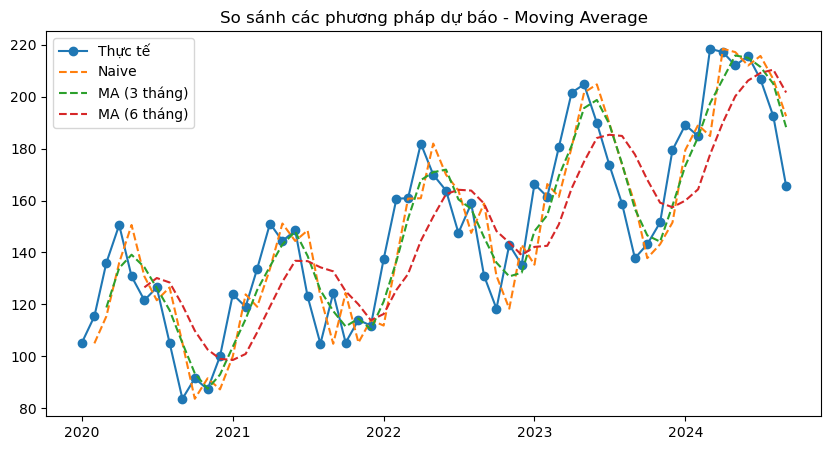

In [10]:

# Ph∆∞∆°ng ph√°p Naive: D·ª± b√°o k·ª≥ sau = gi√° tr·ªã k·ª≥ tr∆∞·ªõc
df['Naive'] = df['Sales_Million_VND'].shift(1)

# Moving Average v·ªõi window = 3 v√† 6
df['MA_3'] = df['Sales_Million_VND'].rolling(window=3).mean()
df['MA_6'] = df['Sales_Million_VND'].rolling(window=6).mean()

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh
plt.figure(figsize=(10,5))
plt.plot(df['Sales_Million_VND'], label='Th·ª±c t·∫ø', marker='o')
plt.plot(df['Naive'], label='Naive', linestyle='--')
plt.plot(df['MA_3'], label='MA (3 th√°ng)', linestyle='--')
plt.plot(df['MA_6'], label='MA (6 th√°ng)', linestyle='--')
plt.title("So s√°nh c√°c ph∆∞∆°ng ph√°p d·ª± b√°o - Moving Average")
plt.legend()
plt.show()



### B√†i 12: Exponential Smoothing

S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p Exponential Smoothing, t√¨m alpha t·ªëi ∆∞u

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

üîπ Alpha t·ªëi ∆∞u (gi√° tr·ªã l√†m sai s·ªë nh·ªè nh·∫•t): 0.9


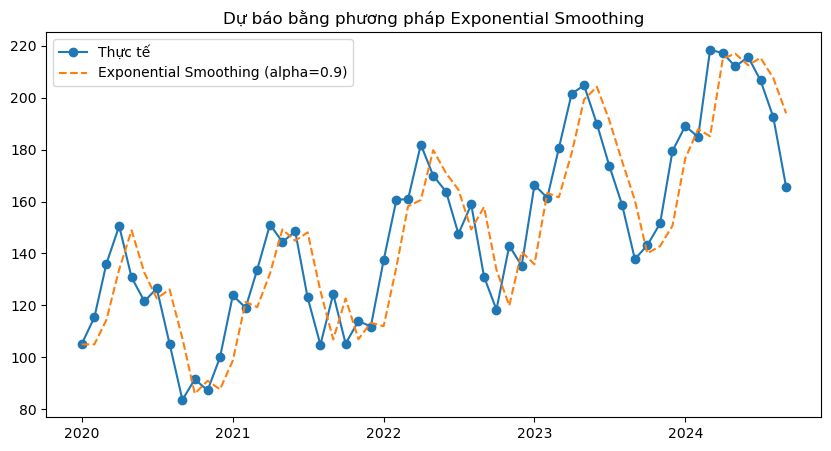

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# T√¨m alpha t·ªëi ∆∞u b·∫±ng c√°ch th·ª≠ nhi·ªÅu gi√° tr·ªã
alphas = np.linspace(0.1, 0.9, 9)
errors = []

for alpha in alphas:
    model = SimpleExpSmoothing(df['Sales_Million_VND']).fit(smoothing_level=alpha, optimized=False)
    df[f'ES_{alpha:.1f}'] = model.fittedvalues
    mae = mean_absolute_error(df['Sales_Million_VND'][1:], df[f'ES_{alpha:.1f}'][1:])
    errors.append(mae)

best_alpha = alphas[np.argmin(errors)]
print(f"üîπ Alpha t·ªëi ∆∞u (gi√° tr·ªã l√†m sai s·ªë nh·ªè nh·∫•t): {best_alpha:.1f}")

# D·ª± b√°o l·∫°i v·ªõi alpha t·ªëi ∆∞u
model_best = SimpleExpSmoothing(df['Sales_Million_VND']).fit(smoothing_level=best_alpha, optimized=False)
df['Exponential_Smoothing'] = model_best.fittedvalues

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10,5))
plt.plot(df['Sales_Million_VND'], label='Th·ª±c t·∫ø', marker='o')
plt.plot(df['Exponential_Smoothing'], label=f'Exponential Smoothing (alpha={best_alpha:.1f})', linestyle='--')
plt.title("D·ª± b√°o b·∫±ng ph∆∞∆°ng ph√°p Exponential Smoothing")
plt.legend()
plt.show()

### B√†i 13: Trend Analysis

X√¢y d·ª±ng ƒë∆∞·ªùng xu h∆∞·ªõng, v√† ƒë√°nh gi√°

Ph∆∞∆°ng tr√¨nh xu h∆∞·ªõng: Sales = 101.09 + 1.67 * t


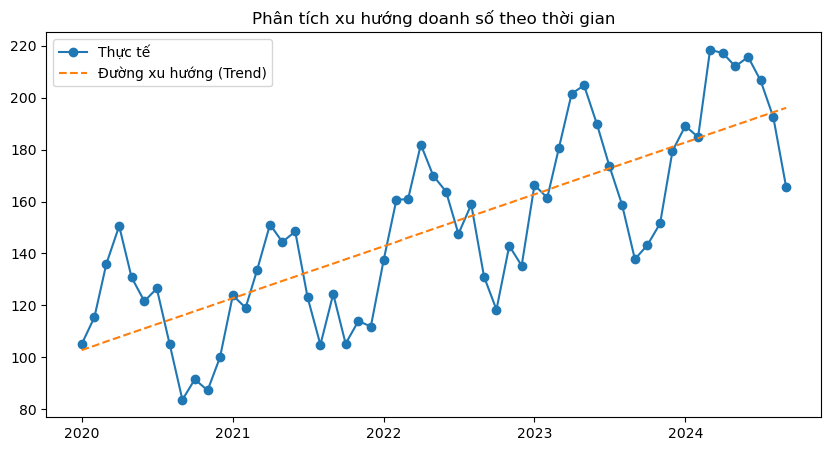

In [16]:
df['t'] = np.arange(1, len(df) + 1)

# H·ªìi quy tuy·∫øn t√≠nh: Sales = a + b*t
model_trend = LinearRegression()
model_trend.fit(df[['t']], df['Sales_Million_VND'])
df['Trend'] = model_trend.predict(df[['t']])

print(f"Ph∆∞∆°ng tr√¨nh xu h∆∞·ªõng: Sales = {model_trend.intercept_:.2f} + {model_trend.coef_[0]:.2f} * t")

# V·∫Ω bi·ªÉu ƒë·ªì xu h∆∞·ªõng
plt.figure(figsize=(10,5))
plt.plot(df['Sales_Million_VND'], label='Th·ª±c t·∫ø', marker='o')
plt.plot(df['Trend'], label='ƒê∆∞·ªùng xu h∆∞·ªõng (Trend)', linestyle='--')
plt.title("Ph√¢n t√≠ch xu h∆∞·ªõng doanh s·ªë theo th·ªùi gian")
plt.legend()
plt.show()

### B√†i 14: Forecast Accuracy

S·ª≠ dung c√°c ƒë·ªô ƒëo kh√°c nhau, ƒë√°nh gi√° 3 ph∆∞∆°ng ph√°p: `Naive`, `Moving Average` v√† `Trend`

In [20]:
def metrics(actual, predicted):
    # Lo·∫°i b·ªè c√°c h√†ng b·ªã NaN (n·∫øu c√≥)
    mask = (~actual.isna()) & (~predicted.isna())
    actual = actual[mask]
    predicted = predicted[mask]
    
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

methods = {
    'Naive': df['Naive'],
    'MA_3': df['MA_3'],
    'MA_6': df['MA_6'],
    'Exponential_Smoothing': df['Exponential_Smoothing'],
    'Trend': df['Trend']
}

print(f"{'Ph∆∞∆°ng ph√°p':<25}{'MAE':>10}{'RMSE':>15}")
print("-"*50)

for name, pred in methods.items():
    mae, rmse = metrics(df['Sales_Million_VND'], pred)
    print(f"{name:<25}{mae:>10.2f}{rmse:>15.2f}")


Ph∆∞∆°ng ph√°p                     MAE           RMSE
--------------------------------------------------
Naive                         14.23          16.55
MA_3                          10.63          12.79
MA_6                          19.36          22.53
Exponential_Smoothing         14.02          16.65
Trend                         18.80          22.19


---